# The Baseball Project

**Prepared for FLIP ROBO by Olumide Ikumapayi-DS2306**

# About The Baseball Dataset

The dataset makes use of data collected during the 2014 Major League Baseball seasons,the purpose of which is to create an algorithm that can predict the number of wins a particular team will achieve in the 2015 season. This prediction is based on various indicators of success and relies on 16 distinct features as inputs for machine learning. Ultimately, the output will be a numerical representation of the team's win count.

Please check the following link for more information regarding the dataset:https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv.

The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries](#Import-Necessary-Libraries)
2. [Importing the Baseball Dataset](#Importing-the-Baseball-Dataset)
3. [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [The Machine Learning Model Training,Evaluation and Predictions](#The-Machine-Learning-Model-Training,-Evaluation-and-Predictions)

  *  i.  [Linear Regression Model](#Linear-Regression-Model)
  *  ii. [Decission Tree Regressor](#Decission-Tree-Regressor)
  *  iii.[Support Vector Machines(SVM)](#Support-Vector-Machines-(SVM))
  *  iv. [K-Nearest Neighbors(KNN)regressor](#K-Nearest-Neighbors-(KNN)-regressor)
  *  v.  [Random Forest Regressor](#Random-Forest-Regressor)
7. [Summary and Conclusion](#Summary-and-Conclusion)
  

# Import Necessary Libraries

Importing all necessary libraries for data manipulation, visualization, and machine learning(ML).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing Dataset

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv'
baseball = pd.read_csv(url)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratory Data Analysis(EDA)

Exploring the dataset in order to gain insights by Checking for missing values, summary statistics, and visualize the data.

In [4]:
df.head(15)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.tail(30)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
#Checking the dimension of the dataset
df.shape

(30, 17)

This dataset contains 30 rows and 17 columns.Out of which 1 is target variable and the remaining 16 are independent variables.

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
# Checking the columns of dataset
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [9]:
# checking the types of columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

There are two(2) types of data(int64 and float64) present in the dataset.


**Baseball Data** The baseball dataset is aimed to predict the number of wins for a Major League Baseball team in the 2015 season based on various statistical indicators of performance. Here's a brief description of the dataset's input features (independent variables) and the output (dependent variable):

**Input Features (Independent Variables):**
* **W (Wins)**: This is the number of games where a pitcher was pitching while their team took the lead and went on to win. The pitcher must have pitched at least 5 innings of work.
* **R (Runs Scored)**: This is the number of times a player crosses home plate, representing runs scored by the team.
* **AB (At Bat)**: This is a batter's plate appearances, not including bases on balls, hit by pitch, sacrifices, interference, or obstruction.
* **H (Hits)**: This is the number of times a batter safely reaches or passes first base after hitting the ball into fair territory without an error or fielder's choice.
* **2B (Doubles)**: This is the number of times a batter safely reaches second base without being called out, often referred to as a "two-bagger."
* **3B (Triples)**: This is the number of times a batter safely reaches third base without being called out, often referred to as a "three-bagger."
* **HR (Home Runs)**: This is the number of home runs scored when the ball is hit in a way that allows the batter to circle the bases and reach home plate safely in one play.
* **BB (Base on Balls)**: This is the number of times a batter receives four pitches called as balls, allowing the batter to be awarded first base.
* **SO (Strikeouts)**: This is the number of times a batter accumulates three strikes during a time at bat, resulting in the batter being out.
* **SB (Stolen Bases)**: This is the number of bases advanced by a runner while the ball is in the possession of the defense.
* **RA (Run Average)**: This is a measure of the rate at which runs are allowed or scored.
* **ER (Earned Runs)**: This is the number of runs that did not occur as a result of errors or passed balls.
* **ERA (Earned Run Average)**: This is the average of earned runs allowed by a pitcher per nine innings pitched.
* **CG (Complete Games)**: This is the number of games where a pitcher was the only pitcher for their team, pitching an entire game.
* **SHO (Shutouts)**: This is the number of complete games pitched with no runs allowed.
* **SV (Saves)**: This is the number of games where a pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, and meets certain conditions.
* **E (Errors)**: This is the number of times a fielder fails to make a play that they should have made with common effort, benefiting the offense.

**Output (Dependent Variable):**
- **W (Wins)**: This is the number of wins credited to the team, representing the target variable that the model aims to predict. This is the key output, and the goal of the case study is to build a predictive model for this variable.

In this dataset, the input features represent various statistics related to team performance, and the output is the number of wins, which serves as a measure of the team's success in the 2015 Major League Baseball season. 

In [10]:
#checking the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
# Separating numerical and categorical columns

#checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)
print("\n")

#Checking for Numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("numerical columns:", numerical_col)

categorical columns: []


numerical columns: ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']


In [13]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [14]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [15]:
# Summary statistics
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [16]:
# Checking the list of counts of target
df["W"].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [17]:
# Checking the unique values in target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

<AxesSubplot:>

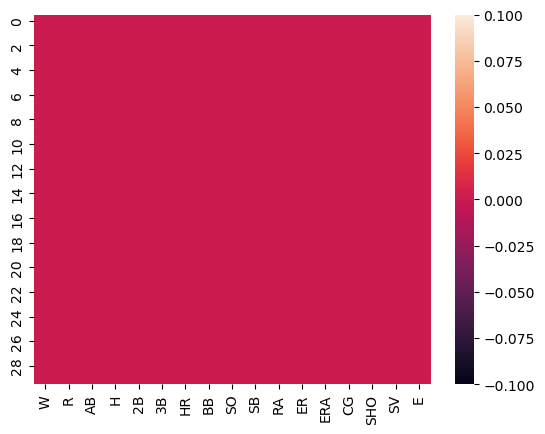

In [18]:
#Lets visualize using heatmap
sns.heatmap(df.isnull())

In [19]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [20]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

<AxesSubplot:>

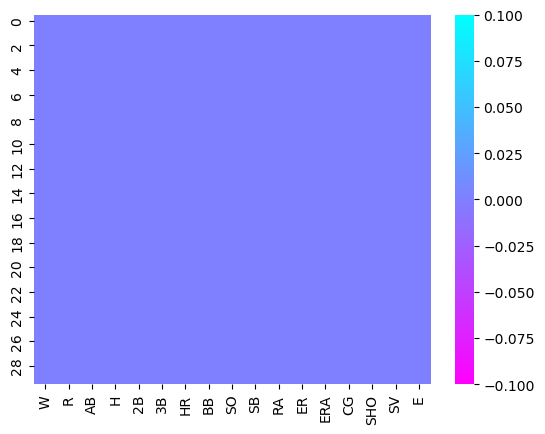

In [21]:
# Lets check the null values again
sns.heatmap(df.isnull(),cmap = "cool_r")

# Data Preprocessing

In [22]:
# Spliting the data into features and target variable
X = baseball.drop('W', axis=1)  # Features
y = baseball['W']  # Target variable

In [23]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Machine Learning Model

## Linear Regression Model

In [24]:
# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Evaluating the LR model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3.892999136999684
Mean Squared Error: 27.94303250666688
Root Mean Squared Error: 5.2861169592307435
R-squared: 0.7876400316149446


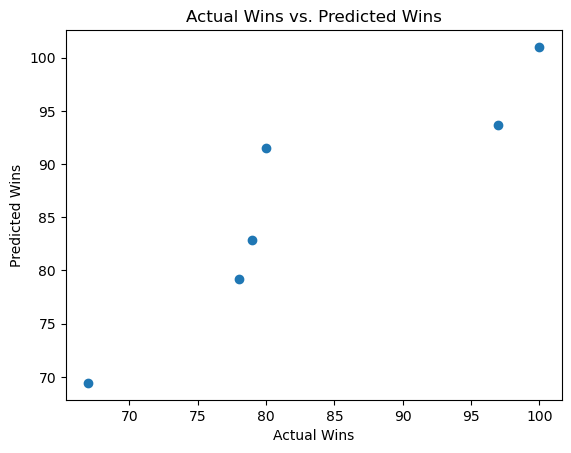

In [27]:
# Creating a scatter plot to visualize the LR predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins')
plt.show()

# Decision Tree Regressor

In [28]:
# Creating and training the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [29]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [30]:
# Evaluating the Decision Tree model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 6.666666666666667
Mean Squared Error: 75.33333333333333
Root Mean Squared Error: 8.679477710861024
R-squared: 0.42748575047498416


# Support Vector Machines (SVM)

In [31]:
# Creating and training the SVR model
model = SVR(kernel='linear')  # We can also experiment with different kernels e.g.'rbf'(radius basis function) e.t.c.
model.fit(X_train, y_train)

SVR(kernel='linear')

In [32]:
# Making predictions on the test set
y_pred = model.predict(X_test)


In [33]:
# Evaluating the SVM model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7.49641372115578
Mean Squared Error: 89.45484884926604
Root Mean Squared Error: 9.458057350707175
R-squared: 0.32016580988524856


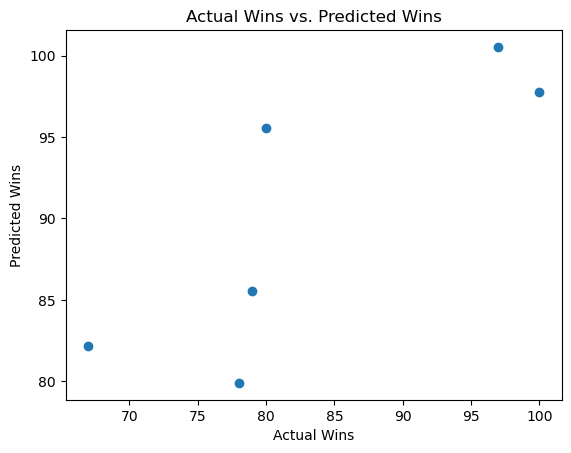

In [34]:
# Creating a scatter plot to visualize the SVM predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins')
plt.show()

# K-Nearest Neighbors (KNN) regressor

In [35]:
# Creating and training the K-Nearest Neighbors (KNN) model
k = 5  
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)


In [37]:
# Evaluating the KNN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Model:")
print(f'Mean Absolute Error: {mae_knn}')
print(f'Mean Squared Error: {mse_knn}')
print(f'Root Mean Squared Error: {rmse_knn}')
print(f'R-squared: {r2_knn}')

K-Nearest Neighbors (KNN) Model:
Mean Absolute Error: 6.5
Mean Squared Error: 69.22000000000001
Root Mean Squared Error: 8.319855767980597
R-squared: 0.4739455351488283


C:\Users\hp\AppData\Local\Temp\ipykernel_1496\1485861576.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Wins')


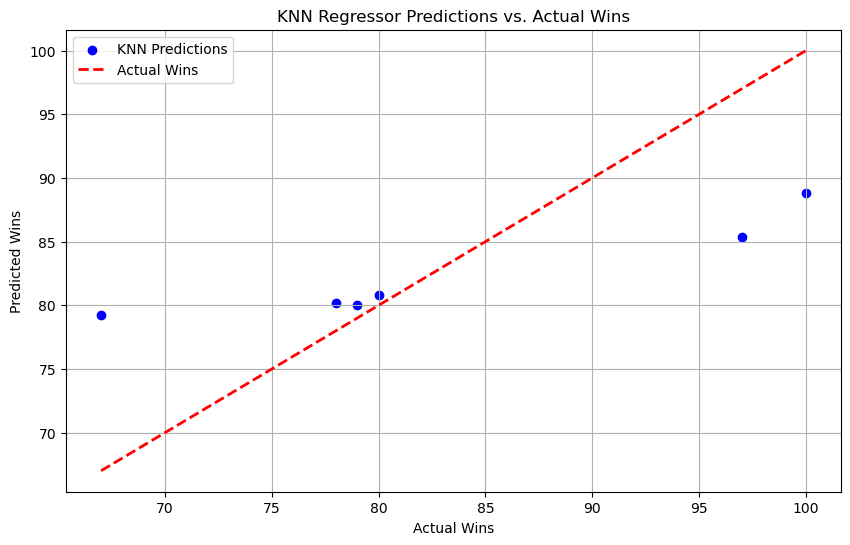

In [38]:
# Creating a scatter plot to visualize the KNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, c='blue', label='KNN Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Actual Wins')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('KNN Regressor Predictions vs. Actual Wins')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Regressor

In [39]:
# Creating and training the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [41]:
# Evaluating the RF model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 5.735000000000002
Mean Squared Error: 51.967916666666675
Root Mean Squared Error: 7.208877628775972
R-squared: 0.6050569981000633


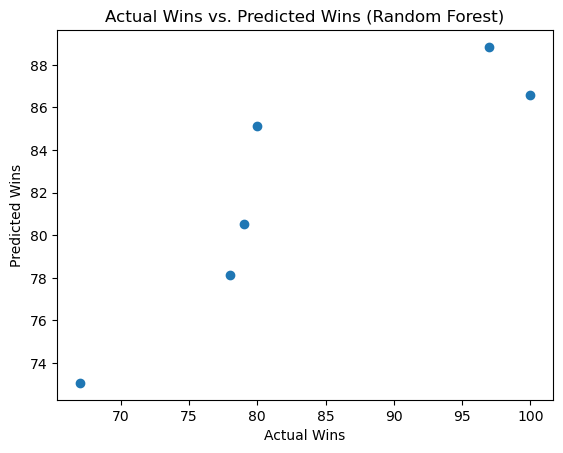

In [42]:
# Creating a scatter plot to visualize the rf predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs. Predicted Wins (Random Forest)')
plt.show()

# Summary and Conclusion

The different models were evaluated to predict baseball wins. The results of linear regression showed a Mean Absolute Error (MAE) of 3.89, a Mean Squared Error (MSE) of 27.94, a Root Mean Squared Error (RMSE) of 5.29, and an R-squared value (R^2) of 0.79. This indicates that linear regression performed well in explaining a significant portion of the variance in the target variable, with relatively low prediction errors.

On the other hand, the decision tree classifier had an MAE of 6.67, MSE of 75.34, RMSE of 8.68, and R^2 of 0.43. These values suggest that the decision tree model had less accurate predictions compared to linear regression and may be overfitting the data.

The support vector machine (SVM) model had even poorer performance with an MAE of 7.49, MSE of 89.45, RMSE of 9.45, and R^2 of 0.32. This indicates that the SVM model explained the variance in the target variable poorly and had higher prediction errors.

The K-Nearest Neighbors (KNN) Classifier has an MAE of 6.5, MSE of 69.22, RMSE of 8.32, and R^2 of 0.47. Analysis reveals that the KNN model exhibits a moderate R-squared value, performing better than the decision tree and SVM models but not as well as linear regression in terms of prediction accuracy.

The Random Forest Classifier demonstrates an MAE of 5.74, MSE of 51.97, RMSE of 7.21, and R^2 of 0.61. Analysis indicates that the random forest model performs admirably with a relatively high R-squared value, suggesting a strong explanation for variance in the target variable. The low RMSE further implies accurate predictions.

In conclusion, linear regression and the random forest model outshine other models in predicting the number of baseball wins. Notably, the random forest model boasts a relatively high R-squared value, highlighting its ability to explain a significant portion of win variance while also exhibiting lower prediction errors. Therefore, it is deemed a suitable choice for this prediction task.